# Cleaning Data

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#les-doublons" data-toc-modified-id="les-doublons-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>les doublons</a></span><ul class="toc-item"><li><span><a href="#Les-titres-en-doublons-?" data-toc-modified-id="Les-titres-en-doublons-?-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Les titres en doublons ?</a></span></li></ul></li><li><span><a href="#les-variables-(à-supprimer,-à-modifier-etc...)" data-toc-modified-id="les-variables-(à-supprimer,-à-modifier-etc...)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>les variables (à supprimer, à modifier etc...)</a></span><ul class="toc-item"><li><span><a href="#Les-années" data-toc-modified-id="Les-années-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Les années</a></span></li><li><span><a href="#color" data-toc-modified-id="color-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>color</a></span></li><li><span><a href="#Suppression-de-variables" data-toc-modified-id="Suppression-de-variables-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Suppression de variables</a></span></li><li><span><a href="#director_name" data-toc-modified-id="director_name-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>director_name</a></span></li></ul></li><li><span><a href="#Les-valeurs-manquantes-(NaN)" data-toc-modified-id="Les-valeurs-manquantes-(NaN)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Les valeurs manquantes (NaN)</a></span><ul class="toc-item"><li><span><a href="#supprimer-la-colonne-qui-a-trop-de-manquants-?" data-toc-modified-id="supprimer-la-colonne-qui-a-trop-de-manquants-?-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>supprimer la colonne qui a trop de manquants ?</a></span></li></ul></li><li><span><a href="#les-zéros" data-toc-modified-id="les-zéros-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>les zéros</a></span><ul class="toc-item"><li><span><a href="#Suppression-des-variables" data-toc-modified-id="Suppression-des-variables-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Suppression des variables</a></span></li><li><span><a href="#Traitement-de-lignes" data-toc-modified-id="Traitement-de-lignes-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Traitement de lignes</a></span></li></ul></li><li><span><a href="#Sauvegarde" data-toc-modified-id="Sauvegarde-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Sauvegarde</a></span></li></ul></div>

## Imports

```%load imports.py``` permet d'importer le contenu du fichier imports.py créé lors de l'étape : [Import des libraries](env.ipynb)

In [5]:
# %load imports.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
plt.rcParams["figure.figsize"] = (16,10)

In [6]:
data = pd.read_csv('data/5000_movies_bis.csv')

## les doublons

In [7]:
start_data_shape = data.shape
start_data_shape

(5043, 28)

In [8]:
sum(data.duplicated())

45

In [9]:
#duplicated_rows_movies_df = data[data.duplicated()]

In [10]:
#data.drop_duplicates(inplace = True)
data.drop_duplicates(ignore_index=True, inplace=True)

In [11]:
data.shape

(4998, 28)

### Les titres en doublons ?

In [12]:
sum(data.duplicated(subset='movie_title', keep=False))

159

On ne les supprime pas car il peut il y avoir des films différents qui portent le même nom (version animation et film ...)

## les variables (à supprimer, à modifier etc...)

### Les années

In [13]:
data['title_year'].head(3)

0    2009.0
1    2007.0
2    2015.0
Name: title_year, dtype: float64

In [14]:
data['title_year'] = data['title_year'].astype(str)
data['title_year'] = data['title_year'].str[0:4]

In [15]:
data['title_year'].head(3)

0    2009
1    2007
2    2015
Name: title_year, dtype: object

* Convertir les années en ```datetime```

In [16]:
#data['title_year'] = pd.to_datetime(data['title_year'])

### color

In [17]:
data.groupby('color')['color'].count()

color
 Black and White     207
Color               4772
Name: color, dtype: int64

### Suppression de variables

On supprime les variables qui nous semblent inutiles

In [18]:
data.drop(columns=['plot_keywords',
                'movie_imdb_link',
                'color',
                'language'
                ], inplace=True)

In [19]:
data.shape

(4998, 24)

### director_name

In [20]:
data.groupby('director_name').imdb_score.agg(['max','min']).reset_index().head(10)

,director_name,max,min
0,A. Raven Cruz,1.9,1.9
1,Aaron Hann,6.0,6.0
2,Aaron Schneider,7.1,7.1
3,Aaron Seltzer,2.7,2.7
4,Abel Ferrara,6.6,6.6
5,Adam Brooks,7.2,7.2
6,Adam Carolla,6.1,6.1
7,Adam Goldberg,5.4,5.4
8,Adam Green,5.7,5.7
9,Adam Jay Epstein,3.8,3.8


## Les valeurs manquantes (NaN)

> ```isnull``` is an alias for ```isna```

* To detect NaN values numpy uses ```np.isnan()```
* To detect NaN values pandas uses either ```.isna()``` or ```.isnull()```

```df.notnull()```  # Opposite of ```.isnull()```

In [21]:
data.isna().sum().sort_values(ascending=False)

gross                     462
budget                    398
aspect_ratio              327
content_rating            301
director_fb_likes         103
director_name             103
num_critic_for_reviews     49
actor_3_name               23
actor_3_fb_likes           23
num_user_for_reviews       21
duration                   15
facenumber_in_poster       13
actor_2_fb_likes           13
actor_2_name               13
actor_1_fb_likes            7
actor_1_name                7
country                     5
movie_fb_likes              0
genres                      0
movie_title                 0
cast_total_fb_likes         0
title_year                  0
imdb_score                  0
num_voted_users             0
dtype: int64

In [22]:
va1 = data.isna().sum().sort_values(ascending=False)
va2 = ((data.isna().sum()*100/data.isna().count()).sort_values(ascending=False))
va2 = va2.round(1)
vadf = pd.concat([va1, va2], axis=1)
vadf = vadf.rename(columns={0: 'nb', 1: '%'},)
vadf

,nb,%
gross,462,9.2
budget,398,8.0
aspect_ratio,327,6.5
content_rating,301,6.0
director_fb_likes,103,2.1
director_name,103,2.1
num_critic_for_reviews,49,1.0
actor_3_name,23,0.5
actor_3_fb_likes,23,0.5
num_user_for_reviews,21,0.4


In [23]:
data.shape

(4998, 24)

In [24]:
data.isna().sum().sum()

1883

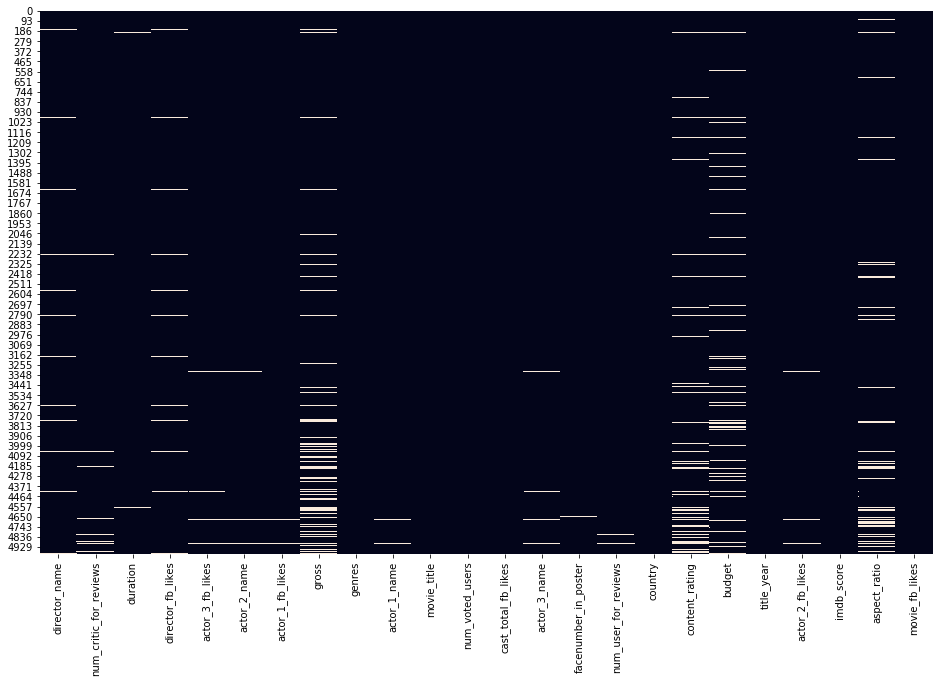

In [25]:
sns.heatmap(data.isna(), cbar=False)

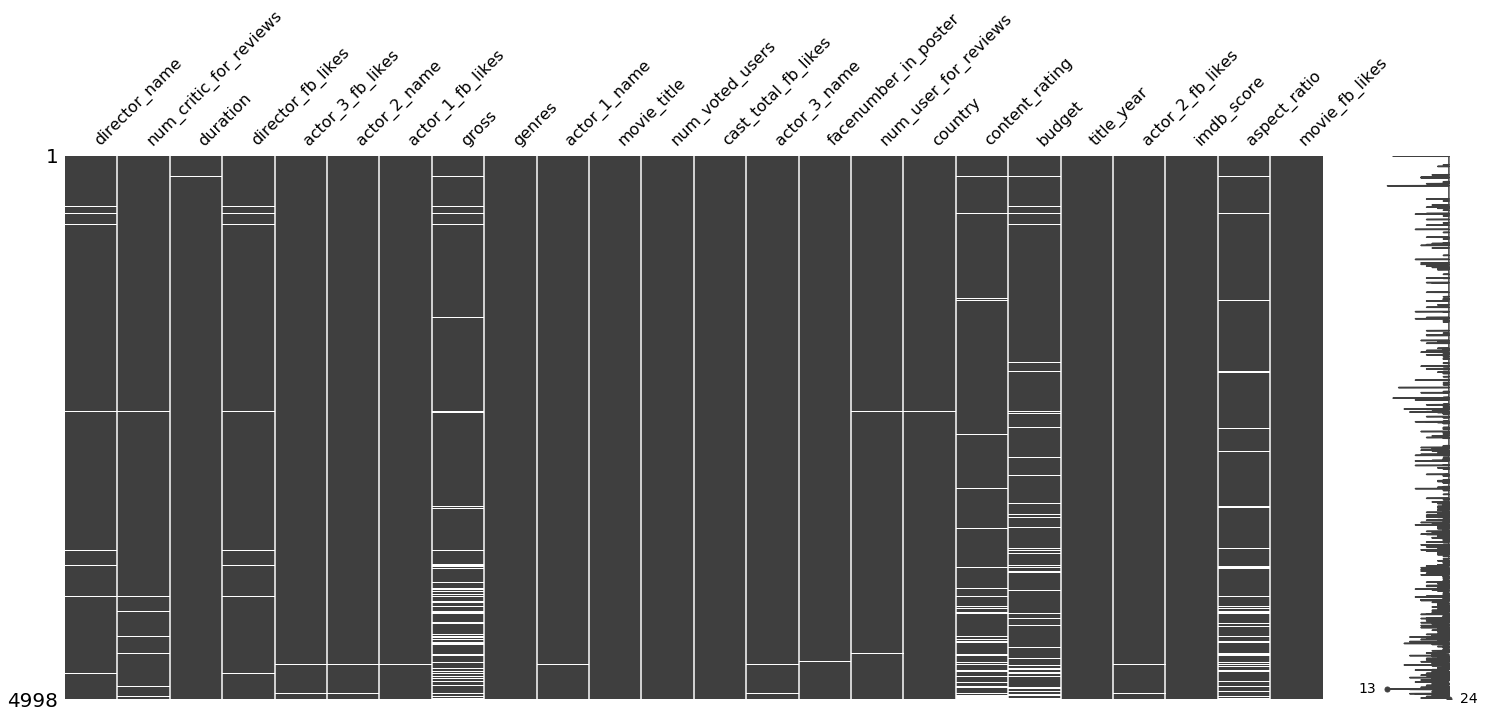

In [26]:
msno.matrix(data)

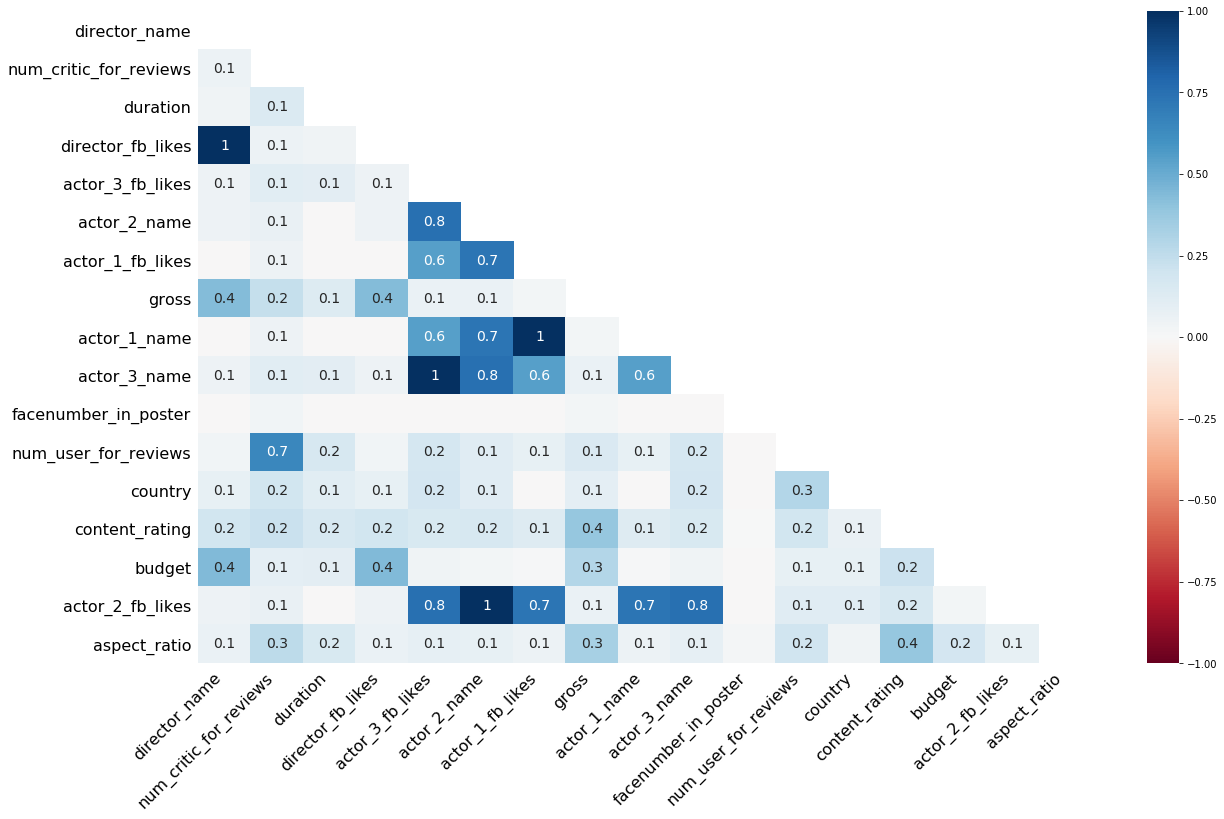

In [27]:
msno.heatmap(data)

* A value near -1 means if one variable appears then the other variable is very likely to be missing.
* A value near 0 means there is no dependence between the occurrence of missing values of two variables.
* A value near 1 means if one variable appears then the other variable is very likely to be present.

* https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/

In [28]:
data = data.dropna(how='any')

> ```df.dropna(how='all')``` #Drop the rows where all elements are missing

* ```any``` : If any NA values are present, drop that row or column.
* ```all``` : If all values are NA, drop that row or column.

In [29]:
#data = data.dropna()

In [30]:
print("total null values: ", data.isna().sum().sum())

total null values:  0


In [31]:
data.shape

(4065, 24)

### supprimer la colonne qui a trop de manquants ?

test 1 : non

## les zéros

In [32]:
data.shape

(4065, 24)

In [33]:
(data == 0).sum().sort_values(ascending=False)

movie_fb_likes            1895
facenumber_in_poster      1738
director_fb_likes          694
actor_3_fb_likes            34
actor_2_fb_likes            14
actor_1_fb_likes             2
cast_total_fb_likes          2
actor_1_name                 0
num_critic_for_reviews       0
duration                     0
actor_2_name                 0
gross                        0
genres                       0
num_voted_users              0
movie_title                  0
aspect_ratio                 0
actor_3_name                 0
num_user_for_reviews         0
country                      0
content_rating               0
budget                       0
title_year                   0
imdb_score                   0
director_name                0
dtype: int64

### Suppression des variables

* qui présentent trop de 0 

In [34]:
data = data.drop(['movie_fb_likes', 'director_fb_likes'], axis='columns')

In [35]:
data.shape

(4065, 22)

### Traitement de lignes

* On supprime les lignes avec des 0
* ! Perte de beaucoup d'information

<span class="girk">TODO: pour ne pas perdre autant de data, refaire le traitement des 0 en supprimant la variable "facenumber_in_poster"</span>

In [36]:
#data = data.loc[(data!=0).any(axis=1)]
#data = data.loc[(data !=0).any(1)]
# https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame

In [37]:
data = data.replace(0, np.nan)
data = data.dropna(axis=0)
data = data.replace(np.nan, 0)

In [39]:
(data == 0).sum().sum()

0

In [40]:
data.shape

(2315, 22)

## Sauvegarde

In [41]:
final_data_shape = data.shape
print("data.shape au départ : ", start_data_shape, "et en fin de traitement : ", final_data_shape)

data.shape au départ :  (5043, 28) et en fin de traitement :  (2315, 22)


In [42]:
data.to_csv('data/data_cleaning.csv')